**Cyberbulling Prediction using Naive Bayes and Support Vector Machine**

In the realm of online discourse, addressing the pervasive issue of cyberbullying is crucial for fostering a positive and safe digital environment. Leveraging advanced machine learning techniques, this study focuses on employing two powerful algorithms—Naive Bayes and Support Vector Machines (SVM)—to predict cyberbullying instances within a dataset of tweet texts. Naive Bayes, known for its simplicity and effectiveness in text classification, is paired with SVM, a robust algorithm that excels in handling high-dimensional data. By harnessing the strengths of these models, this analysis aims to discern patterns and nuances in online communication, offering insights that can contribute to the development of effective strategies for identifying and mitigating cyberbullying on social media platforms.

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
import re
import string

In [2]:
data = pd.read_csv('cyberbullying_tweets.csv')

In [3]:
data.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


# Checking Null Values

In [5]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

# Renaming Columns

In [7]:
data = data.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

# Encoding Columns

In [8]:
data["sentiment_encoded"] = data['sentiment'].replace({"religion": 1, "age": 2, "ethnicity": 3, "gender": 4, "other_cyberbullying": 5,"not_cyberbullying": 6})

In [9]:
data.sample(10)

text            sentiment  \
29885                    @dreameaterciel he probably is.  other_cyberbullying   
30281  @athenahollow @ShadowPraxis i'm married with k...  other_cyberbullying   
30507                          Me: what I'll bEAT yo ass  other_cyberbullying   
33130  all the girls (and guys) that bullied me in hi...                  age   
39369  Didn’t mean to cause ptsd over your middle sch...                  age   
11024  @FrankieJGrande Why did you lie about your age...               gender   
22685  Sikh terrorism is on par with Islamic terroris...             religion   
42362  Nigger lover — I'm a people lover, you dumb fu...            ethnicity   
20276  @asem_1994 Islam only served to slow down scie...             religion   
3579   Never understood how people can do ikea flat p...    not_cyberbullying   

       sentiment_encoded  
29885                  5  
30281                  5  
30507                  5  
33130                  2  
39369                  2  
11024                  4  
22685                  1  
42362                  3  
20276                  1  
3579                   6

In [10]:
stop_words = set(stopwords.words('english'))

# Fucntion to Convert text to lowercase, remove (/r, /n characters), URLs, non-utf characters, Numbers, punctuations,stopwords

In [11]:
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub('[0-9]+', '', text)
    stopchars= string.punctuation
    table = str.maketrans('', '', stopchars)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

# Function to remove contractions


In [12]:
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [13]:
def preprocess(text):
    text = decontract(text)
    text = strip_all_entities(text)
    return text

In [14]:
data

text          sentiment  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

       sentiment_encoded  
0                      6  
1                      6  
2                      6  
3                      6  
4                      6  
...                  ...  
47687                  3  
47688                  3  
47689                  3  
47690                  3  
47691                  3  

[47692 rows x 3 columns]

In [15]:
data['cleaned_text'] = data['text'].apply(preprocess)
data.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   sentiment_encoded                                       cleaned_text  
0                  6            words katandandre food crapilicious mkr  
1                  6  aussietv white mkr theblock imacelebrityau tod...  
2                  6                   classy whore red velvet cupcakes  
3                  6  meh p thanks heads concerned another angry dud...  
4                  6  isis account pretending kurdish account like i...

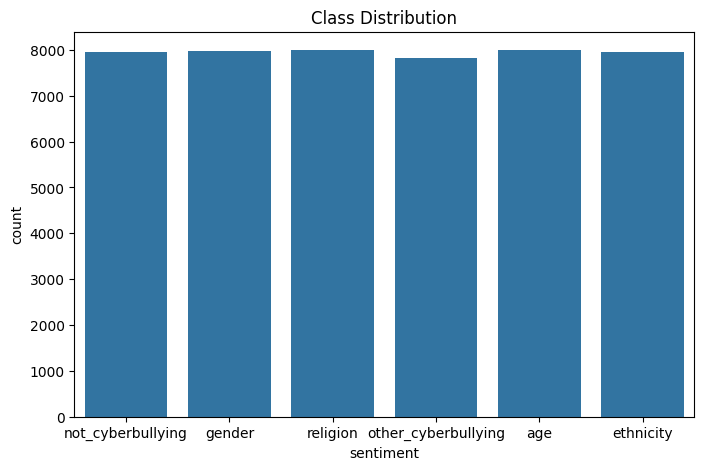

In [16]:
# Plotting distribution of classes in dataset to see if there's an imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data)
plt.title('Class Distribution')
plt.show()

Inference : Well-balanced classes, hence no action required.

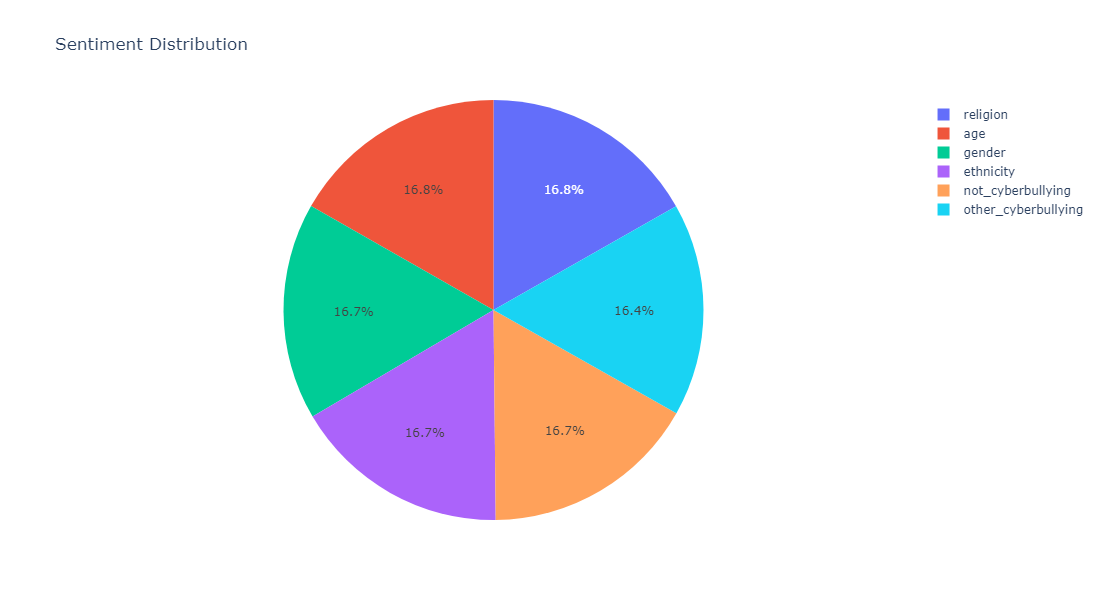

In [17]:
#Plotting pie chart to see distribution of each sentiment
import plotly.express as px

fig = px.pie(data, names='sentiment', title='Sentiment Distribution')
fig.update_layout(width=900, height=600)
fig.show()


The the sentiments are almost equally distributed

In [18]:
def unique_word_share(text):
    words = text.split()
    word_count = len(words)
    unique_word_count = len(set([w.lower() for w in words]))
    word_uniqueness = round(unique_word_count * 100/word_count,2)
    return word_uniqueness

data['lexical_uniqueness'] = data['text'].apply(unique_word_share)

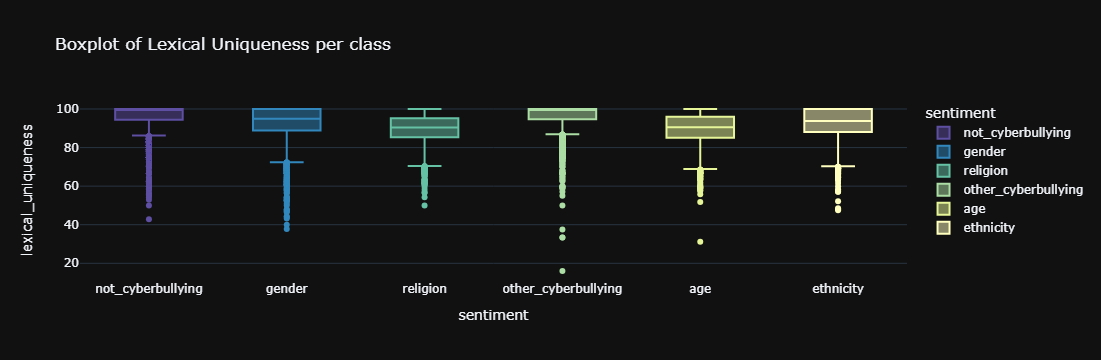

In [19]:
fig = px.box(data,
             x = 'sentiment',
             y = 'lexical_uniqueness',
             color = 'sentiment',
             color_discrete_sequence = px.colors.diverging.Spectral_r,
             template = 'plotly_dark',
             title = 'Boxplot of Lexical Uniqueness per class')


fig.show()



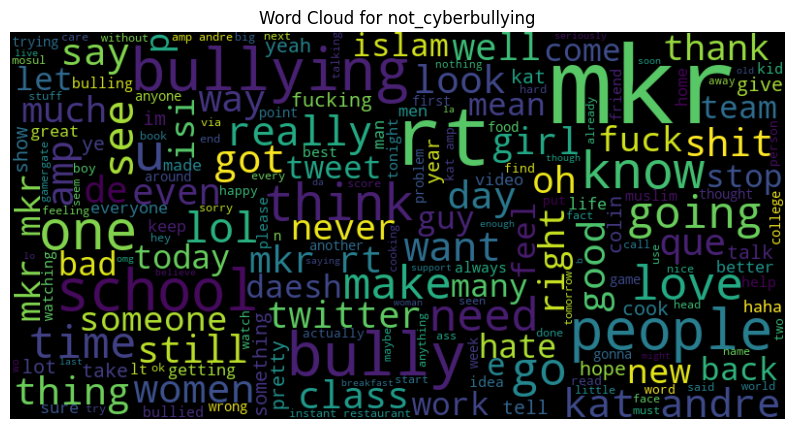

In [20]:
from wordcloud import WordCloud

target_sentiment = 'not_cyberbullying'

# Combining cleaned text for the selected sentiment class
sentiment_text = ' '.join(data[data['sentiment'] == target_sentiment]['cleaned_text'])

# Check if there are words available
if sentiment_text:
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=110).generate(sentiment_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {target_sentiment}')
    plt.show()
else:
    print(f"No words available for {target_sentiment}. Check your data or preprocessing steps.")


words like bullying,bully ,mkr,rtwomen,class are occuring more often

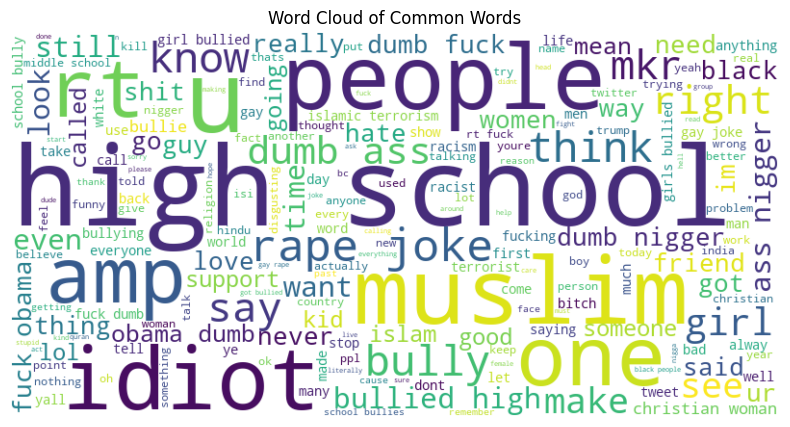

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words')
plt.show()


The most common words are school,people,high,muslim,bully etc

In [22]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['cleaned_text']
Y = data['sentiment_encoded']

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Creating and training a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, Y_train)

# Predicting on the testing set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 0.7594087430548275
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.96      0.89      1566
           2       0.80      0.96      0.87      1603
           3       0.86      0.91      0.88      1603
           4       0.76      0.80      0.78      1531
           5       0.58      0.51      0.55      1612
           6       0.64      0.42      0.51      1624

    accuracy                           0.76      9539
   macro avg       0.75      0.76      0.75      9539
weighted avg       0.74      0.76      0.75      9539



1. **Overall Accuracy:** The model achieves an accuracy of 75.9%, indicating its effectiveness in sentiment classification, though there's room for improvement.

2. **Class-Specific Performance:** High precision in classes 1, 2, and 3 demonstrates accurate identification of positive sentiments, while lower precision and recall in classes 5 and 6 suggest challenges in distinguishing between negative sentiments.

3. **Balanced Metrics:** Despite variations, the model maintains balanced precision, recall, and F1-score metrics, reflecting fair performance across multiple sentiment classes.

4. **Areas for Enhancement:** Consider refining the model to better capture nuances in negative sentiments, potentially through feature engineering or exploring more sophisticated algorithms.

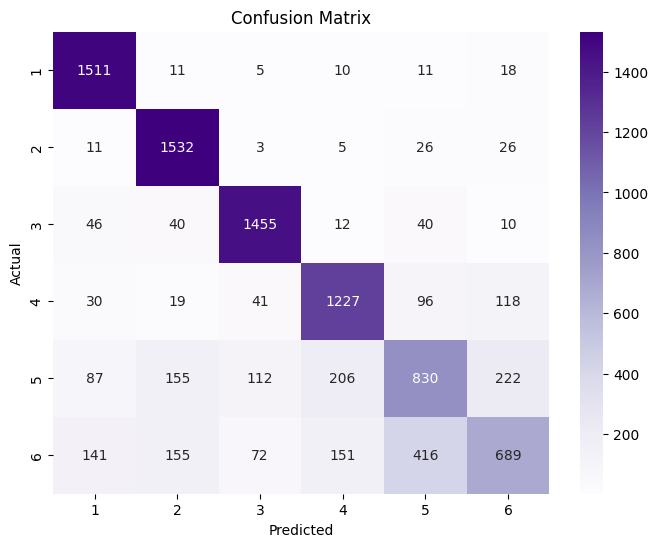

In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, Y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

C:\Users\Soham Lad\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



In [27]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report(Y_test, y_pred_svm))


SVM Accuracy: 0.815703952196247
SVM Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.95      0.94      1566
           2       0.95      0.97      0.96      1603
           3       0.98      0.97      0.97      1603
           4       0.87      0.83      0.85      1531
           5       0.58      0.68      0.63      1612
           6       0.59      0.52      0.55      1624

    accuracy                           0.82      9539
   macro avg       0.82      0.82      0.82      9539
weighted avg       0.82      0.82      0.82      9539



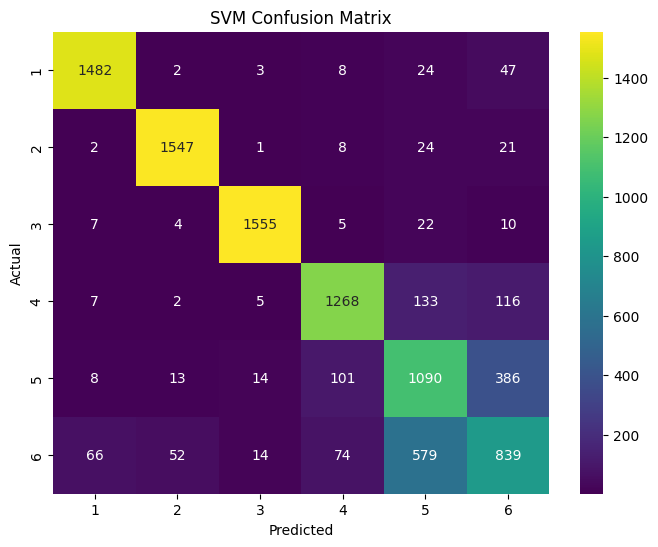

In [28]:
# Visualize the SVM confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="viridis", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. **Overall Accuracy:** The SVM model achieves an accuracy of 81.6%, indicating its capability in correctly classifying sentiments across diverse categories.

2. **Precision and Recall:** Precision and recall metrics showcase strong performance, with high values for most classes, emphasizing the model's ability to make accurate predictions and capture relevant instances.

3. **Class-Specific Analysis:** Notably high precision in classes 1, 2, and 3 reflects accurate identification of positive sentiments, while balanced precision-recall in classes 4, 5, and 6 suggests robust handling of neutral and negative sentiments.

4. **Room for Improvement:** Although overall performance is good, there's potential for enhancement, particularly in distinguishing between closely related sentiment categories. Further optimization or exploring advanced models may address these nuances.

**Conclusion**

The Naive Bayes and Support Vector Machines (SVM) models prove effective in predicting cyberbullying within tweet texts. Leveraging their respective strengths, these models accurately classify content, offering valuable insights into online dynamics. This work contributes to creating a safer digital space by identifying and addressing instances of cyberbullying on social media platforms.

In [29]:
# import pickle

# # Save the trained model
# with open('svm_model.pkl', 'wb') as file:
#     pickle.dump(model, file)


In [31]:
import pickle

pickle.dump(svm_model,open('svm_model.pkl','wb'))